For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

*1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column*.

*2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.*

*3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.*

*4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.*

*5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.*

For each chart, make sure to use a copy of the data frame.

The boilerplate also includes commands to save and return the image.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_18784\1479204510.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=df_box, ax=axes[0], palette="Set2")
C:\Users\Inteli\AppData\Local\Temp\ipykernel_18784\1479204510.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], order=month_order, palette="Set3")


Text(0, 0.5, 'Page Views')

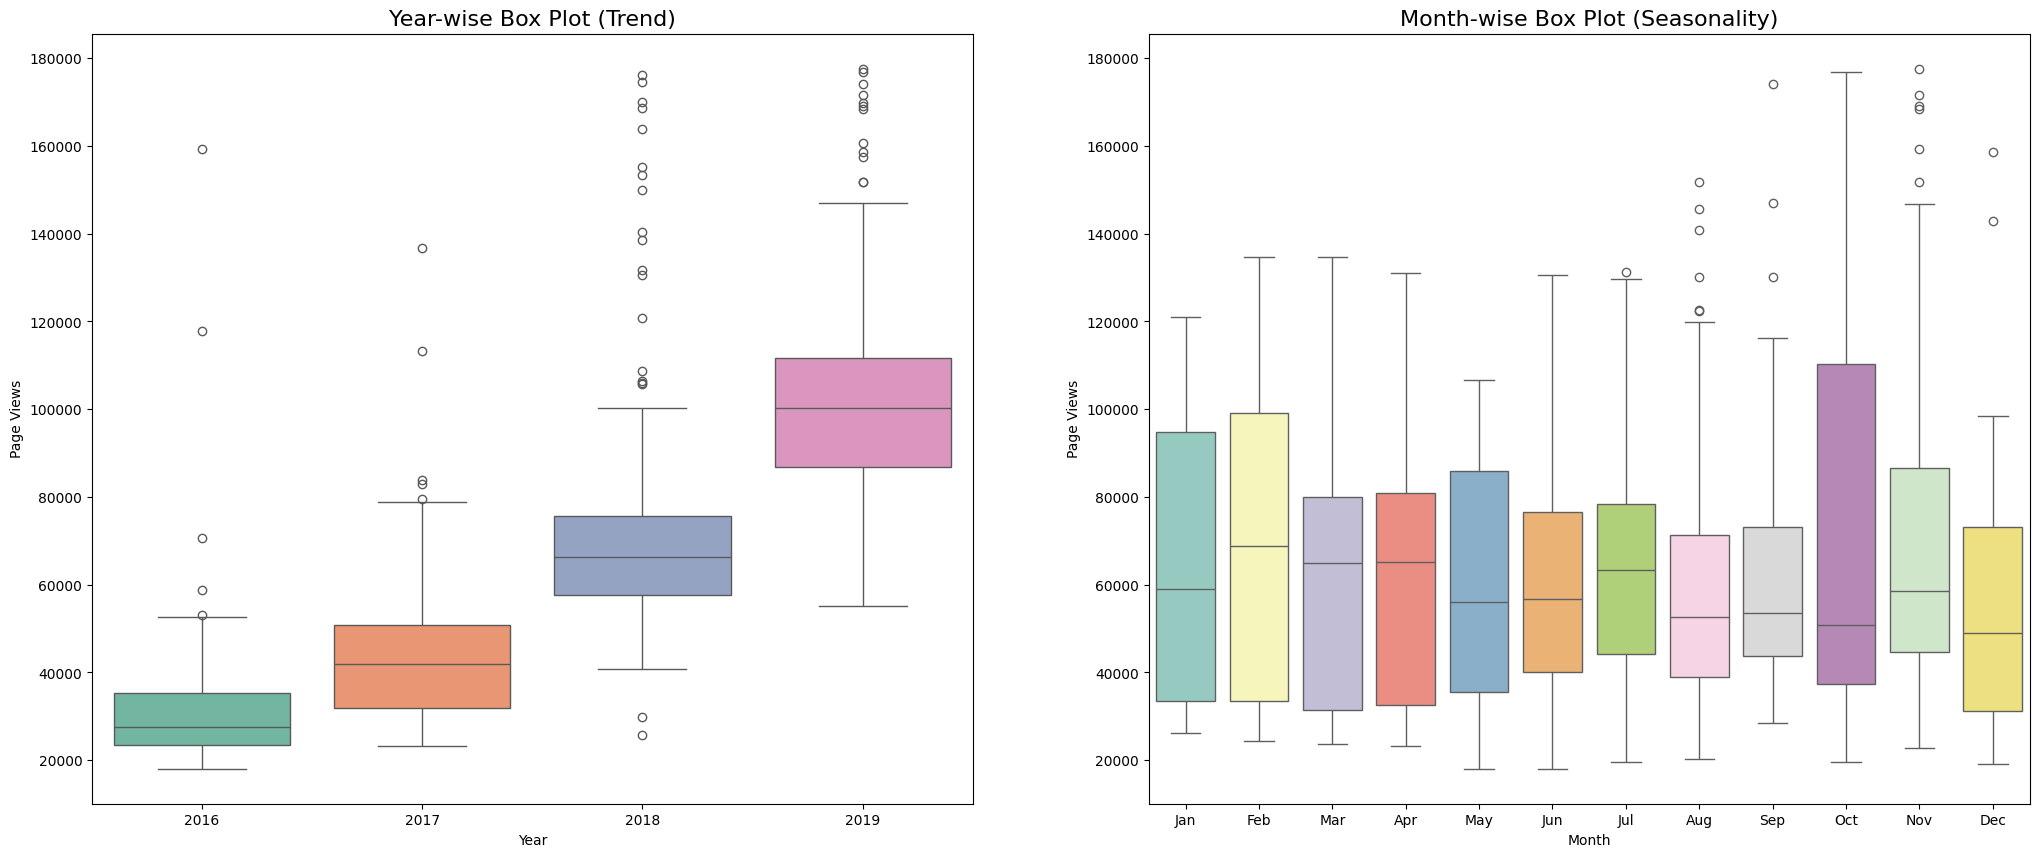

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# incluí tambem numpy e o modulo calendar
import numpy as np
import calendar
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('fcc-forum-pageviews.csv')
df.set_index('date', inplace=True)

df.index = pd.to_datetime(df.index)

df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    fig = plt.figure(figsize=(17, 6))
    plt.plot(df.index, df['value'], color='red')
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    df.index = pd.to_datetime(df.index)

    df_bar = df.groupby([df.index.year, df.index.month])['value'].mean()
    
    years = [2016, 2017, 2018, 2019]
    months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    
    x = np.arange(len(years))
    width = 0.4 / 12
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    for i, m in enumerate(months):
        month_values = []
        for year in years:
            try:
                month_values.append(df_bar.loc[(year, m)])
            except KeyError:
                month_values.append(0)
        ax.bar(x + i*width, month_values, width=width, label=calendar.month_name[m])
    
    xticks_pos = x + width*(len(months)-1)/2
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels([str(y) for y in years], rotation=90)
    
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    ax.legend(title="Months", loc="upper left", bbox_to_anchor=(0, 1))
    fig.savefig('bar_plot_groupby.png')
    return fig

    # Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

month_order = [calendar.month_abbr[i] for i in range(1, 13)]
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

sns.boxplot(x='year', y='value', data=df_box, ax=axes[0], palette='deep')
axes[0].set_title('Year-wise Box Plot (Trend)', fontsize=16)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], order=month_order, palette='deep')
axes[1].set_title('Month-wise Box Plot (Seasonality)', fontsize=16)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')



